<a href="https://colab.research.google.com/github/CHOOSLA/Self_Studying_of_Machine-Learning_and_Deep-Learning/blob/main/Chapter_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#############################
########인공 신경망##########
#############################

#럭키백 행사에 주 고객층인 20대를 타깃으로 이전보다 럭키백의 정확도를 높혀야 한다면?
#로지스티 회귀 알고리즘으로 충분할까?

#패션 MNIST
#판매할 패션 상품의 데이터는 아직 없지만 판매할 상품과 똑같은 데이터를 구할 수 있다면?
#MNIST란? 머신러닝과 딥러닝을 처음 배울 때 많이 사용하는 데이터셋이 있다.
#머신러닝에서는 붓꽃 데이터셋이 유명하지만, 딥러닝에서는 MNIST 데이터셋이 유명하다
#이 데이터는 0~9까지의 숫자로 이루어져 있습니다.
#MINIST와 크기,개수가 동일하지만 숫자 대신 패션 아이템으로 이루저니 데이터가 패션 MNIST

#텐서플로를 사용해보자
from tensorflow import keras
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
#keras.datasets.fashion_mnist 모듈 아래 load_data() 라는 친절한 메소드가 있따
#왼쪽 폴더아이콘에서 sample_data에서 확인가능

print(train_input.shape,train_target.shape)
#28x28 크기의 6만개의 사진
print(test_input.shape,test_target.shape)
#1만개

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


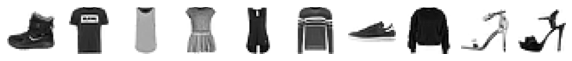

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [5]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i],cmap='gray_r')
  axs[i].axis('off')
plt.show()

print([train_target[i] for i in range(10)])

import numpy as np
print(np.unique(train_target,return_counts=True))


In [6]:
#로지스틱 회귀로 패션 아이템 분류하기
#4장 SGDSClassfier 클래스의 loss를 'log'로 지정하여
#손실 함수를 최소화하는 확률적 경사 하강법 모델을 만들었다.
#'hinge'가 기본 값이다

#하지만 사용하기 전에 표준화 전처리 작업 = StandartScalar 를 사용했다.
#가장 가파른 방향을 따라 이동하기 때문에 특성 마다 값의 범위가 다르면 어떤 특성은 의미가 없어진다
#패션 MNIST의 경우 각 픽셀은 0~255 사이의 정수 값을 가지고 있다. 이런 이미지의 경우 보통 255로 나누어 0~1사이의 값으로
#'정규화'한다.
#4장에서 보았듯이 SGDClassifier은 2차원 입력을 다루지 못하기 때문에 1차원 배열로 만들어야한다.

train_scaled = train_input / 255.0 #실수 값으로 만듦
train_scaled = train_scaled.reshape(-1,28*28)
print(train_scaled.shape)

(60000, 784)


In [7]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log',max_iter= 5,random_state=42)
scores = cross_validate(sc,train_scaled,train_target,n_jobs=1)
print(np.mean(scores['test_score']))
#반복 횟수를 5개로 지정 이상이 되어도 딱히 증가하지 않는다.
#뭐 이것은 cross_validate로 확인이 가능하겠네요
#아니면 반복문으로 matplotlib을 사용해서 그래프로 확인해 보아도 좋겠네요

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.8195666666666668


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [8]:
#로지스틱 회귀 공식을 떠올려볼까요?
# z = a x (weight) + b x (Length) + c x (diagonal) + d x (heights) + e x (width) + f
#무게 , 길이 , 대각선, 높이, 부피라는 특성에 a,b,c,d,e라는 가중치와 f 바이어스를 합해
#z라는 값을 구하고 로지스틱 함수에 넣어서 퍼센테이지를 구한다.
#이것을 패션MNIST에 맞추면 각 픽셀(특성,차원) 마다 가중치가 곱해지고 더해져서 나오겠죠?
#그리고 라벨이 지금 10개가 있으니깐 각각의 가중치가 다 달라야 겠죠?
#28X28(픽셀의 개수)=784개에 곱해지는 가중치가 다 다르고 X10개의 품목정도의 가중치 개수가 있겟죠?
#그러면 7840개의 가중치가 있어야된다는 뜻입니다.
#거기서 다중 분류를 위해서면 소프트맥스 함수를 사용해야 하는데
#소프트맥스 함수는 모든 z를 다 계산 해야겠죠? 엄청 오래걸립니다


##인공신경망
#이미지 분류 문제에는 인공 신경망이 잘 어울린다!
#가장 기본적인 인공 신경망은 확률적 경사 하강법을 사용하는 로지스틱 회귀와 같습니다.


#우리가 각 가중치가 곱해지고 그게 또 더해져서 z가 나오는데
#z가 나오는 층을 **출력층**이라고 합니다
#인공 신경망에서 z 값을 계산하는 단위를 **뉴런**이라고 합니다 하지만 뉴런에서 일어나는 일은 선형계산이 전부이다
#이제는 뉴런이란 표현 대신에 **유닛**이라고 부르는 사람이 더 많아지고 있다.
#784개의 픽셀을 x1,x2와 같이 바꾸엇다. 이런 층을 **입력층**이라고 불린다.


#어떤 임계값이 있는데 그것을 초과하면 신호를 발산!

#텐서플로란? 텐서플로는 구글이 2015년 11월 오픈소스로 공개한 딥러닝 라이브러리
#이 때를 기점으로 딥러닝에 대한 개발자의 관심이 늘어났고 알파고가 나오면서 폭발적인 인기!
#2019년 9월 2.0 버전이 릴리스 되엇다. 이 책에선 2.X 최신 버전을 사용 코랩에는 이미 설치되어있다.

#텐서플로에서는 저수준 API와 고수준 API가 있다. 바로 케라스가 텐서플로의 고수준 API
#딥러닝 라이브러리는 GPU를 사용하여 벡터와 행렬연산에 매우 최적화 되어 있다.
#케라스 라이브러리는 직접 GPU 연산을 하지 않고 GPU연산을 수행하는 다른 라이브러리를 백엔드로 사용
#텐서플로가 케라스의 백엔드 중 하나인것
#이외에도 씨아노,CNTK와 같은 여러 딥러닝 라이브러리를 케라스 백엔드로 사용가능하다.
#이런 케라스를 멀티-백엔스 케라스라고 부른다.
#케라스 API만 익히면 다양한 딥러닝 라이브러리를 입맛에 맞게 골라서 쓸 수 있는 것이다!

#그래서 텐서플로 안에 케라스 API가 내장되어 잇다. 텐서플로 2.0에서는 케라스API만 남김

In [9]:
#인공 신경망으로 모델 만들기

#여기에서는 앞서 로지스틱 회귀에서 만든 훈련데이터 train_scaled, train_target을 사용하겠다.
#로지스틱 회귀에서는 교차 검증(cross_validate)를 사용했지만 인공신경망에서는 검증 세트를 따로 떼어낸다.

#이렇게 하는 이유는
#1 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검승 점수가 안정적
#2 교차 검증을 수행하기에는 훈련시간이 너무 오래 걸린다.
#어던 딥러닝 모델은 훈련하는데 몇시간, 심지어 며치이 거릴 수도 있습니다.


from sklearn.model_selection import train_test_split
train_scaled, val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

print(train_scaled.shape,train_target.shape)
print(val_scaled.shape,val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [10]:
#케라스 레이어 패키지 안에는 다양한 층이 준비되어 있습니다.
#가장 기본이 되는 층은 **밀집층**입니다.
#왜? 784개의 픽셀과 10개의 z를 뽑아내는 뉴런이 모두 연결되어있다.
#이게 밀집층

#모두 연결하고 있기 때문에 **완전 연결층**이라고도 부른다.

#Dense 클래스를 사용해 밀집층을 만들어 보죠. 필요한 매개변수는 뉴런 개수, 뉴련의 출력에 적용할 함수, 입력의 크기입ㄴ다.
dense = keras.layers.Dense(10,activation='softmax',input_shape=(784,))
#10 = 출력층개수 , 뉴련의 출력에 적용할 함수, 입력의 크기 순
#뉴련의 선형 방정식 계산 결과에 적용되는 함수를 **활성화 함수**라고 부른다.

model = keras.Sequential(dense)
#밀집층을 가진 신경망 모델을 Sequential클래스를 사용해서 만듦

In [11]:
##인공신경망으로 패션 아이템 분류하기
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
#이진분류: loss = 'binary_crossentropy'
#다중분류: loss = 'categorical_crossentropy'

#**원-핫 인코딩** --> p357 조금 많이 김
#간단히 말하면 로그 함수를 써서 예측확률을 구하는데
#정답에 최대한 가까워질려면 출력층에 0,1,0,~ 처럼 원하는 결과만 1로 만들고 나머지는 0이어야한다.

print(train_target[:10])
#우리가 보는 타깃은 모두 정수값인데 원핫인코딩을할려면 첫번째 인덱스는 0,0,0,0,0,1,0,0,0,0,0 이렇게 해야되는데
#그럴필요가 없는 것이 있음 그게 sparse_categorical_crossentropy 타깃이 정수인 다중 분류 라는 의미 sparse = 희소


#이제 두번째 매개변수인 metrics에 알아보자
#케라스는 모델이 훈련할 때 기본으로 에포크마다 손실 값을 출력한다.
#손실이 줄어드는 것을 보고 훈련이 잘되었다는 것을 알 수 있지만 정확도를 함께 출력하면 좋죠
#이를 위해 metirics 매개변수에 정확도 지표를 의미하는 accuracy를 지정

[7 3 5 8 6 9 3 3 9 9]


In [12]:
model.fit(train_scaled,train_target,epochs=5)
#5번 반복해봄

Epoch 1/5
1500/1500 [==============================] - 3s 1ms/step - loss: 0.6074 - accuracy: 0.7929
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4785 - accuracy: 0.8386
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4554 - accuracy: 0.8482
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4435 - accuracy: 0.8527
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4375 - accuracy: 0.8547


In [13]:
model.evaluate(val_scaled,val_target)
#모델의 성능을 평가 ( 다른 곳에선 cross_validate 를 사용)


375/375 [==============================] - 1s 1ms/step - loss: 0.4459 - accuracy: 0.8522


[0.44585156440734863, 0.8521666526794434]

In [14]:
##07-2
##2개의 층

#다시 케라스 API를 사용해서 패션 MNIST 테이터셋을 불러오겠습니다.
from tensorflow import keras
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

from sklearn.model_selection import train_test_split
train_scaled = train_input/255
train_scaled = train_scaled.reshape(-1,28*28)
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

#1절에서 만든 신경망 모델과 다른 점은 입력층과 출력층 사이에 밀집층이 추가된 것입니다.
#이렇게 입력층과 출력층 사이에 있는 모든 층을 **은닉층**이라고 부릅니다.
#은닉층에는 주황색 원으로 활성화 함수가 표시되어 있스빈다.
#활성화 함수는 선형방정식의 계산 값에 적용하는 함수입니다.
#이전 절에서 출력층에 적용했던 소프트맥스 함수도 활성화 함수 입니다.
#출력층에 적용하는 활성화 함수는 종류가 제한되어 있스빈다.
#이진 분류일 경우 시그모이드, 다중 분류일 경우 소프트맥스 함수
#이에 비해 은닉츠으이 활성화함수는 비교적 자유롭다.
#대표적으로 시그모이드 함수와 볼 렐루 함수 등을 사용

#시그모이드 활성화 함수를 사용한 은닉층과 소프트맥스 함수를 사용한 출력층을 케라스의 Dense 클래스로 만들어보자
dense1 = keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
dense2 = keras.layers.Dense(10,activation='softmax')

#dense1이 은닉층이고 100개의 뉴럭을 가진 밀집층이다.
#은닉층의 뉴럭 개수를 정하는 데는 특별한 기준이 없기에, 판단에는 상당한 경험이 필요하다.

#한가지 제약 사항이라면 출력층의 뉴런보다는 많게 만들어야합니다.

In [15]:
#심층 신경망 만들기
model = keras.Sequential([dense1,dense2])
#Sequntial 클래스의 객체를 만들 때 여러개의 층을 추가하려면 이와 같이 dense1과 dense2를 리스트로 만들어 전달한다.
#이 리스트는 층을 순서대로 놓아야한다.
model.summary()
#맨 첫줄에 모델의 이름이 나오고 모델에 들어 있는 층이 나온다.
#층 이름을 지정하지 않으면 알아서 dense라고 이름을 정함
#출력 크기를 보면 (None,100) 이다. 첫 번째 차원은 샘플의 개수를 나타냅니다.
#샘플 개수가 아직 정의되어 있지 않기 때문에 None이다.
#왜? 케라스 모델의 fit 메서드에 훈련테이터를 주입하면 이 데이터를 한번에 모두 사용하지 않고
#잘게 나누어 여러번에 걸쳐 경사 하강법 단게를 수행한다. 즉, 미니배치 경사 하강법 사용

#케라스의 기본 미니배치 크기는 32개이다.
#batch_size로 바굴 수 있다.
#따라서 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 none 으로 설정
#이렇게 신경망 층에 입력되거나 출력되는 배열의 첫 번째 차원을 **배치 자원**이라고 한다.

#두번째는 출력의 갯수

#마지막으로 모델의 파라미터 개수가 잇는데 이층은 Dense 층이므로 입력 픽셀 784개와 100개의 모든 조합에대한 가중치가 있다.
#그러고 뉴런마다 1개의 절편이 있다.

#즉 784개(픽셀의 개수)의 차원 * 100개의 뉴런 + 100개의 출력
#summary 메서드의 마지막에는 총 모델 파라미터 개수와 훈련되는 파라미터 개수가 동일하게 79510개가 나온다.
#은닉층과 출력층의 파라미터 개수를 합친 값
#간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층이 있다. 아래서 알아보자

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [16]:
##층을 추가하는 다른 방법

model = keras.Sequential([
                                 keras.layers.Dense(100,activation='sigmoid',input_shape=(784,),name='hidden'),
                                keras.layers.Dense(10,activation='softmax',name='output')],name='패션 MNIST 모델')

model.summary()


model = keras.Sequential()
model.add(keras.layers.Dense(100,activation='sigmoid',input_shape=(784,),name='hidden'))
model.add( keras.layers.Dense(10,activation='softmax',name='output'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Model: "패션 MNIST 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [====

In [17]:
##렐루함수

#초창기 인공 신경망의 은닉츠엥 많이 사용된 활성화함수는 시그모이드였지만
#시그모이드는 오른쪽과 왼쪽 끝으로 갈수록 그래프가 누워있기 때문에 올바른 출력을 만드는데 신속하게 대응하지 못한다.


#이를 개선하기 위해 다른 종류의 활성화 함수가 제안되었다.
#그게 바로 렐루 함수.
#렐루 함수는 아주 간단하다.
#입력이 양수일 경우 마치 활성화 함수가 없는 것처럼 그냥 입력을 통과시키고
#음수일 경우는 0으로 만든다.

#렐루함수는 max(0,z)와 같이 쓸 수 있죠 z가 0보다 크면 z를 출력하고 0보다 작으면 0을 출력
#렐루 함수는 이미지 처리에서 좋은 성능을 낸다고 알려져있다.

#minist데이터는 28*28 크기이기 때문에 인공 신경망에 주입하기 위해 넘파이 배열의 reshpae()메서드를 사용해 1차원으로 펼쳤지만
#케라스는 이를 위한 Flatten 층을 제공한다!!!
#Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 한다.
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))#입력층
model.add(keras.layers.Dense(100,activation='relu'))#은닉층
model.add(keras.layers.Dense(10,activation='softmax'))#출력층

model.summary()

#첫 번재 등장하는 Flatten 클래스에 포함된 모델 파라미터는 0개이다.
#케라스의 Flatten층을 신경망 모델에 추가하면 입력값의 차원을 짐작할 수 있는 것이 또 하나의 장점
#앞의 출력에서 784개의 입력이 첫 번째 은닉층에 전달된 다는 것을 알 우수 있었지만
#이전에 만들었던 모델에서는 쉽게 눈치채기 어려웠습니다.
#입력 데이터에 대한 전처리 과정을 가능한 모델에 포함시키는 것이 케라스 api 철학 중 하나

(train_input,train_target),(test_input,test_target)= keras.datasets.fashion_mnist.load_data()
train_scaled = train_input /255.0
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)
#시그모이드 함수보다 약간 향상

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5301 - accuracy: 0.8124
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3917 - accuracy: 0.8593
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3561 - accuracy: 0.8710
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.

In [18]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3746 - accuracy: 0.8727


[0.3745909333229065, 0.8727499842643738]

In [19]:
##옵티마이저
#3장에서 하이퍼파라미터는 모델이 학습하지 않아 사람이 지정해주어야 하는 파라미터라고 설명
#신경망에서는 특히 하이퍼파라미터가 ㅁ낳다.
#지금가지 다룬 하이퍼파라미터는 은닉층의 개수, 뉴런 개수, 활성화 함수, 층의 종류, 배치 사이즈 매개변수, 에포크 매개변수 등이 있다.

#은닉층을 여러개 추가할 수 있다.
#은닉층의 개수는 모델이 학습하는 것이 아니라 우리가 지정해 주어야 할 하이퍼파라미터!!
#그럼 은닉층의 뉴런 개수도 하이퍼파라미터? yes...

#케라스는 기본적으로 미니배치 경사하강법을 사용하며 미니배치 개수는 32개
#fit()메서드의 batch_size 매개변수에서 이를 조정할 수 잇다.
#compile() 메서드는 케라스의 기본 경사 하강법 알고리즘인 RMSprop을 사용했다.
#케라스는 다양한 종류의 경사 하강법 알고리즘을 제공한다.
#이들을 옵티마이저라고 부른다.
#RMSprop의 학습률 또한 조정할 하이퍼파라미터 중 하나.


#처음부터 최적값을 찾는 것은 어려운 작업이ㅏㄷ.
#여기서는 여거라지 옵티마이저를 테스트해보겠습니다.

model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')
#'sgd' 문자열은 이클래스의 기본 설정 매개변수로 생성한 객체와 동일합니다.


sgd = keras.optimizers.SGD() #이 옵티마이저는 구현되어있다.
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics='accuracy')
#완전히 동일 위랑

sgd = keras.optimizers.SGD(learning_rate=0.1) #학습률 조정
#ㄱ본 경사 하강법 옵티마이저는 모두 sgd클래스에서 제공
#sdg 클래스의 momentum 매개변수의 기본값은 0 입니다.
#이를 0보다 큰 값으로 지정하면 마치 이전의 그레이디언트를 가속도 처럼 사용하는
#모멘텀 최적화를 사용
#보통 모멘텀 매개변수는 0,9이상ㅇ을 지정
#다음처럼 sgd클래스의 nestorov 매개변수를 기본값 false에서 true로 바꾸면
#네스테로프 모멘텀 최적화를 사용

sgd= keras.optimizers.SGD(momentum=0.9,nesterov=True)
#네스테로프 모멘텀은 모멘텀 최적화를 2번 반복하여 구현
#대부분으 ㅣ경우 네스테로프 모멘텀 최적화가 기본 확률적 경사 하강법 보다 더 나은 성능으 제공한다.

#모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있습니다.
#이렇게하면 안정적으로 최적점에 수렴할 가능성이 높다.
#이런 학습률을 적응적 학습률
#이런 방식들은 학슬률 매개변수를 ㅎ튜닝하는 수고를 덜 수 있는 것이 장점

#적응적 합습률을 사용하는 대표적인 옵티마이저는 Adagrad와 RMSprop
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad,loss='sparse_categorical_crossentropy',metrics='accuracy')
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop,loss='sparse_categorical_crossentropy',metrics='accuracy')

#모멘텀 최적화(이전의 그레이디언트를 가속도처럼 사용)와 RMSprop(적응적 학습률)을 합한게
#Adam
#이 3개의 클래스는 학습률이 모두 0.001dmf tkdyd
#어렵다....


model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)
#거의 같다

model.evaluate(val_scaled,val_target)
#조금 더 나은 결과

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5228 - accuracy: 0.8195
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3923 - accuracy: 0.8599
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3513 - accuracy: 0.8724
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3267 - accuracy: 0.8815
Epoch 5/5
375/375 [==============================] - 1s 1ms/step - loss: 0.3613 - accuracy: 0.8708


[0.3613111078739166, 0.8708333373069763]

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'accuracy'])


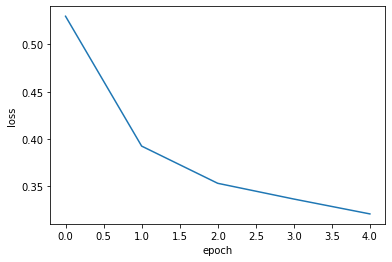

In [20]:
##07-3
#신경망 모델 훈련

#사실 신경망모델의 fit은 히스토리를 반환함
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100,activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

#신경망 모델에 또 은닉층을 추가하는 함수

model = model_fn()
model.summary()

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=5,verbose=0)
#verbose =0 이란 0으로 지정하면 훈련과정을 나타내지 않음
print(history.history.keys())

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show() #보면 엘보우가 보인다


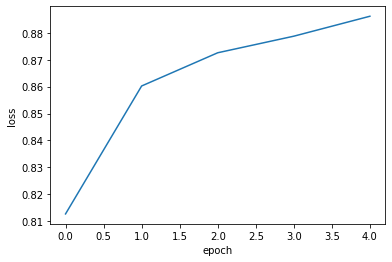

In [21]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show() 

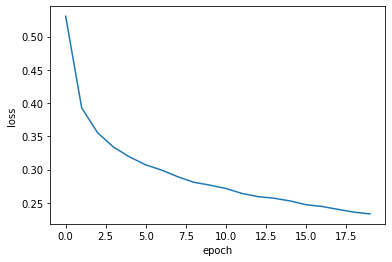

In [22]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


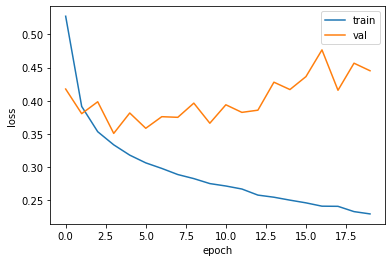

In [23]:
#인공 신경망 모델이 최적하 하는 대상은 정확도가 아니라 손실함수에 최적화해야함
#모델이 잘 훈련되는지 판단하려면 손실함수를 봐야됨

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
##반복할 수록 과대접합이 되는것을 확인할 수 있다

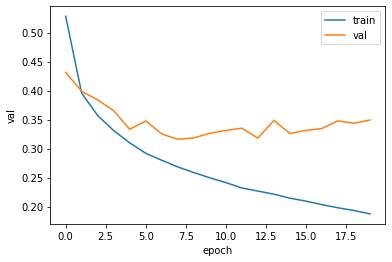

In [29]:
model = model_fn()

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('val')
plt.legend(['train','val'])
plt.show()
#옵티마이저를 adam으로 바꿨더니 과대적합이 약간 해결됬다

In [31]:
#드롭아웃

#훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는다.
#5장에서 보았듯이 드롭아웃을 적용해 훈련하는 것은 마치 2개의 신명알 앙상블 하는 것 처럼 상상할 수 있습니다.
#5장에서 보았듯이 앙상블은 과대적합을 막아 주는 아주 좋은 기법입니다.
#앙상블 학습은 더 좋은 예측 결과를 만들기 위해 여러개의 모델을 훈련하는 머신러닝 알고리즘을 말한다.

model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


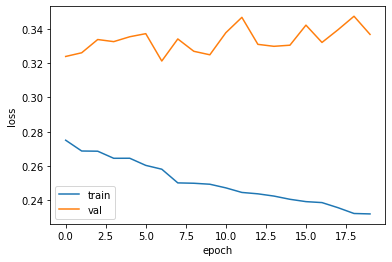

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
##검증을 할 때는 자동으로 드롭아웃을 뺀다

In [37]:
##모델 저장과 복원
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=10,verbose=0,validation_data=(val_scaled,val_target))
model.save_weights('model-weights.h5')
model.save('model-whole.h5')
!ls -al *.h5

-rw-r--r-- 1 root root 332480 Oct 28 12:49 model-weights.h5
-rw-r--r-- 1 root root 981736 Oct 28 12:49 model-whole.h5


In [39]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')
#저장했던 가중치를 다시 불러왔다

In [44]:
#이 모델의 검증 정확도를 확인해 보겠다!

#케라스에서 예측을 수행하는 predict()메서드는 사이킷런과 달리
#샘플마다 10개의  클래스에 대한 확률을 반합니다.
#다중 분류이기 때문입니다. ( 뭐 이건 당연한 말이죠 ? )

#패션 MINIST데이터셋에서 덜어낸 검증세트의 샘플개수는 1200개이다

print(model.predict(val_scaled).shape)

import numpy as np
val_labels = np.argmax(model.predict(val_scaled),axis=-1)##-1은 배열의 마지막 차원
#여기서는 1차원 배열이 되겠지?
#argmax는 최대값의 인덱스를 반환함
#이것이 무엇이냐면
#10개 종류의 옷이 있으니깐 각각 확률이 나올 탠데
#제일 높은 확률이 정답으로 예측하겠지?
#그것의 인덱스 값을 반환하는 것
#샘플이 12000개 있으니간 12000개의 예측 값을 나타내는것
print(val_labels.shape)
print(np.mean(val_labels==val_target))
#예측확률 계산

#predict 메서드 결과에서 가장 큰 값을 고르기 위해
#넘파이 argmax()함수를 사용했습니다
#이 함수는 배열에서 가장 큰 값의 인덱스를 반환
#예를 들어 첫번째 원소가 가장 큰 값일 경우 0을 반환한다.


(12000, 10)
(12000,)
0.882


In [46]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled,val_target)
#똑같은 결과

375/375 [==============================] - 1s 1ms/step - loss: 0.3324 - accuracy: 0.8820


[0.3324086368083954, 0.8820000290870667]

In [50]:
#근데 우리는 반복횟수를 위해 두번 훈련시켰다
#이게 귀찮은데 안 그러는 방법이 있을까?


##콜백
#훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
#fit 메서드의 callbacks 매개변수에 리스트로 전달하여 사용한다.
#여기서 사용할 ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장한다.
#save_best_only =True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다.

model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)#최적의 모델 저장
model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb])

In [51]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3218 - accuracy: 0.8856


[0.3218475878238678, 0.8855833411216736]

In [53]:
##조기종료
#여전히 20번의 에포크를 하지만 이것을 과대적합이 시작되기 전에 훈련을 미리 중지할 수 있다.

#조기종료를 위한 EarlyStopping 콜백을 제공한다.
#patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수
#patience = 2 로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지
#best_weights 매개변수를 True 로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.

#EarlyStropping 콜백와 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검승 손실의 모델을 파일에 저장하고
#검증 손실이 다시 상승할때 훈련을 중지할 수 있다.
#즉, 반복에 대한 자동으로 가자 낮은 검증손실과 가장 좋은 가중치값 저장
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

12


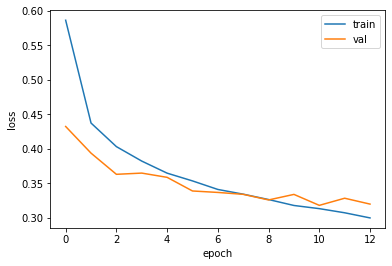

In [57]:
print(early_stopping_cb.stopped_epoch)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [58]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3183 - accuracy: 0.8870


[0.3183203637599945, 0.8870000243186951]